<a href="https://colab.research.google.com/github/dnsm96/Walmart-Stock-Price-Prediction/blob/main/Walmart_Stock_Price_Prediction_module_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Walmart Stock Price Analysis

# **Introduction**



Walmart Inc. (WMT) is one of the largest retail corporations in the world, with its stock being a key indicator of consumer spending trends and economic conditions. The Walmart Stocks Data (2025) provides insights into the company's financial performance, investor sentiment, and market trends.

\

# **Features Included in the Dataset:**



📅 Date – The trading day recorded.

🟢 Open Price – The stock price at market opening.

🔼 High Price – The highest stock price reached during the day.

🔽 Low Price – The lowest stock price reached during the day.

🔴 Close Price – The stock price at market closing.

📉 Adjusted Close Price – The closing price adjusted for stock splits and dividends.

📈 Trading Volume – The total number of shares traded on that day.

💰 Dividends – Cash payments made to shareholders.

🔄 Stock Splits – Records stock split events affecting share value.

\
This dataset is valuable for investors, analysts, and data scientists aiming to analyze market trends, stock performance, and historical price fluctuations. 🚀

\


**Why Analyze Walmart Stocks?**

\

✅ Investment Insights: Helps investors make data-driven decisions.

✅ Market Trends: Understand retail sector performance.

✅ Economic Indicator: Reflects consumer spending behavior.

\
By analyzing Walmart's 2025 stock data, traders, investors, and analysts can predict trends, assess risks, and make informed financial decisions.

\
**Objective:**

By using the pre existing data, we are going to train a model to predict the share price

This will help us make better investments

In [ ]:
#Importing the most commonly used libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#importing the data
df = pd.read_csv('/content/drive/MyDrive/walmart_stock_prices.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13233 non-null  object 
 1   Open          13233 non-null  float64
 2   High          13233 non-null  float64
 3   Low           13233 non-null  float64
 4   Close         13233 non-null  float64
 5   Volume        13233 non-null  int64  
 6   Dividends     13233 non-null  float64
 7   Stock Splits  13233 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 827.2+ KB


In [ ]:
#changing the date column to date format
df['Date'] = pd.to_datetime(df['Date'], utc = True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          13233 non-null  datetime64[ns, UTC]
 1   Open          13233 non-null  float64            
 2   High          13233 non-null  float64            
 3   Low           13233 non-null  float64            
 4   Close         13233 non-null  float64            
 5   Volume        13233 non-null  int64              
 6   Dividends     13233 non-null  float64            
 7   Stock Splits  13233 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1)
memory usage: 827.2 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,13233.000000,13233.000000,13233.000000,13233.000000,1.323300e+04,13233.000000,13233.000000
mean,11.942685,12.047041,11.840625,11.946184,2.244184e+07,0.000922,0.001587
std,15.857590,15.979783,15.739790,15.865461,1.839004e+07,0.011606,0.058295
min,0.002839,0.002839,0.002617,0.002839,0.000000e+00,0.000000,0.000000
25%,0.331929,0.335493,0.329170,0.332387,1.190220e+07,0.000000,0.000000
50%,7.361626,7.430911,7.237296,7.350794,1.875690e+07,0.000000,0.000000
75%,14.864691,15.031126,14.768921,14.910342,2.801850e+07,0.000000,0.000000
max,105.300003,105.300003,103.599998,105.050003,3.955008e+08,0.208000,3.000000


In [ ]:
#checking for null values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


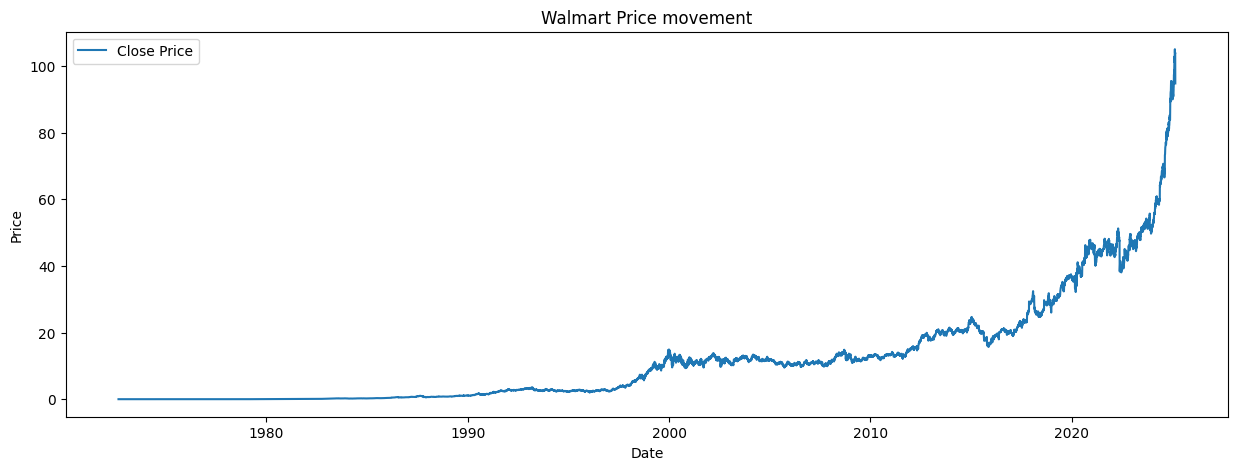

In [ ]:
# Visualizing the stock price

plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['Close'], label = 'Close Price')
plt.title('Walmart Price movement')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

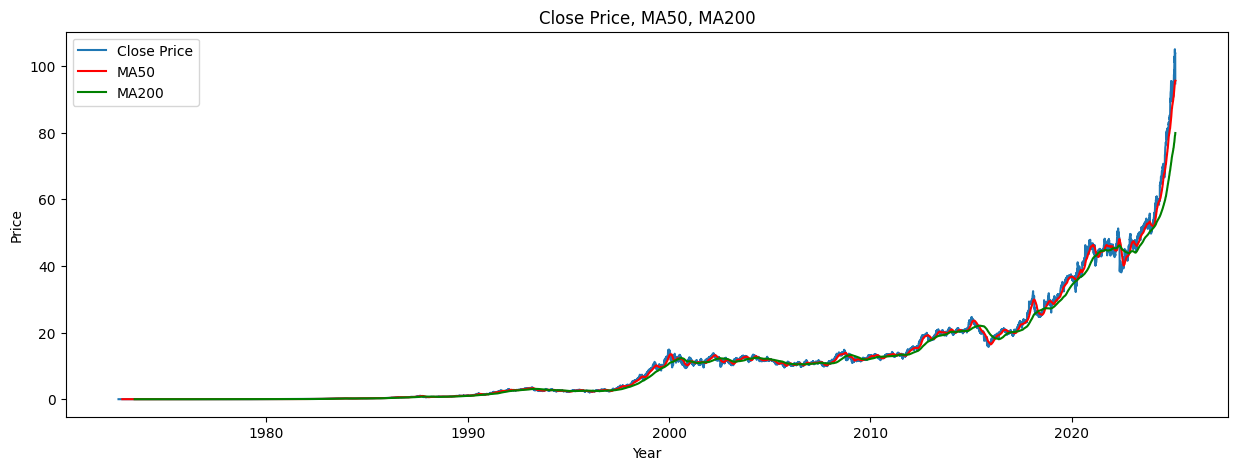

In [ ]:
#checking volataility using moving averages

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(15,5))
plt.plot(df['Date'],df['Close'],label='Close Price')
plt.plot(df['Date'],df['MA50'],label='MA50',color='Red')
plt.plot(df['Date'],df['MA200'],label='MA200',color='Green')
plt.title('Close Price, MA50, MA200')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

✅ Why Moving Averages?

The 50-day MA shows short-term trends.

The 200-day MA shows long-term trends

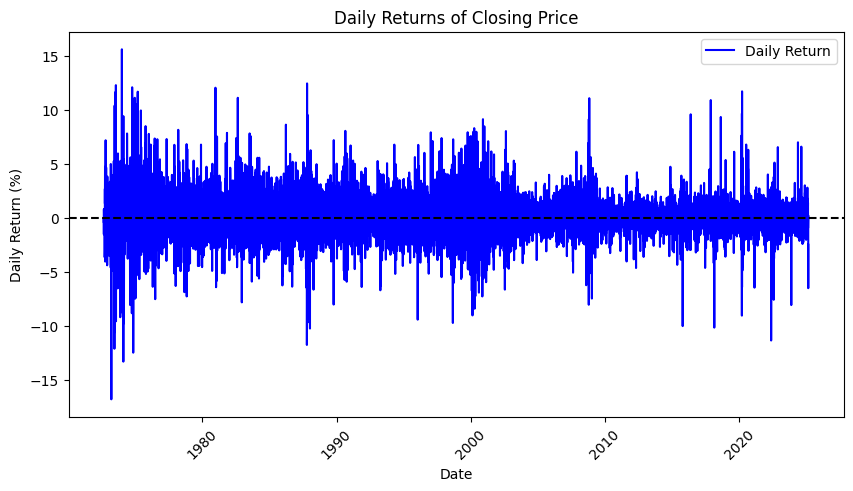

In [ ]:
# Calculate daily return (percentage change)

df['Daily Return'] = df['Close'].pct_change() * 100

# Plot daily returns
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Daily Return'], label='Daily Return', color='blue')

plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.title('Daily Returns of Closing Price')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Positive returns → Stock is gaining value.

Negative returns → Stock is losing value.

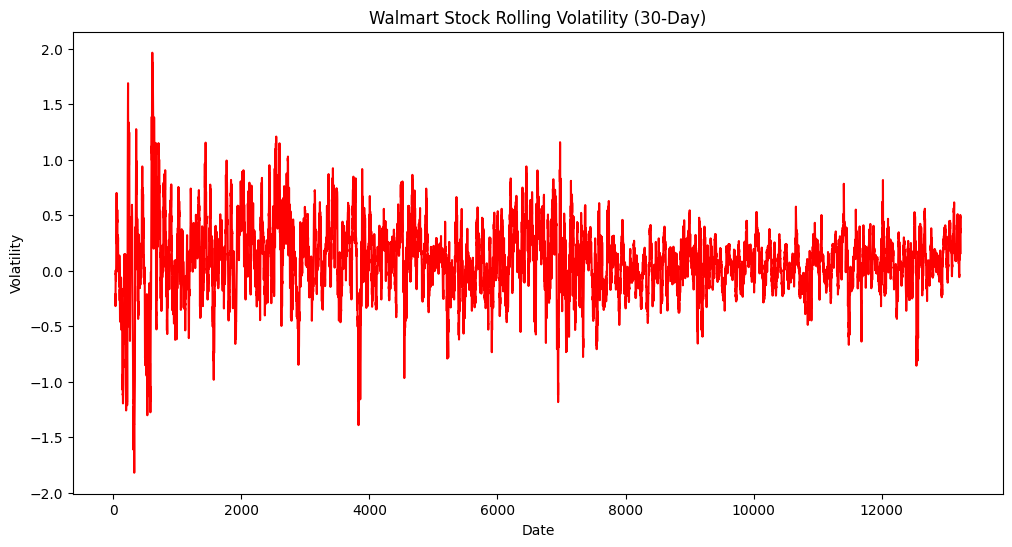

In [ ]:
#Calculating the volataility

df['Volatility'] = df['Daily Return'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Volatility'], color='red')
plt.title("Walmart Stock Rolling Volatility (30-Day)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.show()

✅ High volatility periods may signal market crashes or earnings announcements.

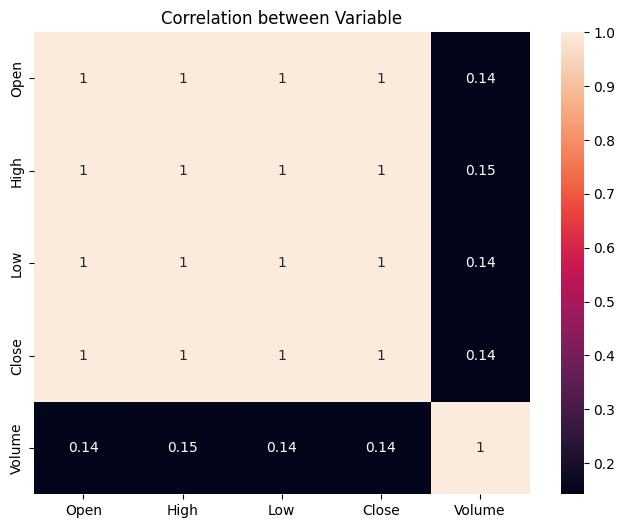

In [ ]:
#correlation analysis

correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation between Variable')
plt.show()

Volume might have lower correlation with stock prices

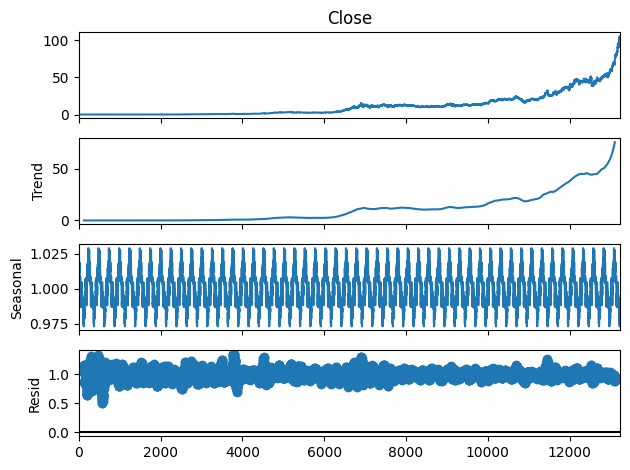

In [ ]:
#Time serier analysis
import statsmodels.api as sm

#Time series decomposition

decomposition = sm.tsa.seasonal_decompose(df['Close'], model = 'multiplicative', period = 252)
decomposition.plot()
plt.show()

**Overall Interpretation**

- The trend shows long-term growth in the stock price.
- The seasonal component suggests a repeating cycle, possibly related to economic cycles, earnings reports, or investor behavior.
- The residuals are relatively stable, meaning the model captures most of the structure in the data.

In [ ]:
#checking if the data is stationary
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Close'])
print("p-value of ADF test is", adf_test[1])

p-value of ADF test is 1.0


The ADF test shows strong evidence that the data is not stationary.

We need differencing to make the data stationary

In [ ]:
diff_price = df['Close'].diff().dropna()
adf_test1 = adfuller(diff_price)

print("p-value of ADF test is",adf_test1[1])

p-value of ADF test is 9.302604686645593e-30


Now we can see that the data is stationary

In [ ]:
split_ration = 0.9

split_index = int(len(df['Close']) * split_ration)
train, test = df['Close'][:split_index], df['Close'][split_index:]

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error

In [ ]:
#applying log transformation to improve model performance
train1 = np.log1p(train)
test1 = np.log1p(test)

In [ ]:
arima_model = ARIMA(train1, order = (1,2,1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=len(test))

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
arima_mse = mean_squared_error(test1, arima_forecast)
arima_rmse = np.sqrt(arima_mse)
arima_rmse

0.18190081506048722

In [ ]:
sarima_model = SARIMAX(train1, order = (2,1,5),  seasonal_order=(1, 0, 1, 12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=len(test))

In [ ]:
sarima_mse = mean_squared_error(test1, sarima_forecast)
sarima_rmse = np.sqrt(sarima_mse)
sarima_rmse

0.3612329052814509

Both ARIMA and SARIMA models give high error even after data transformations

ARIMA rmse = 0.18190081506048722

SARIMA rmse = 0.3612329052814509

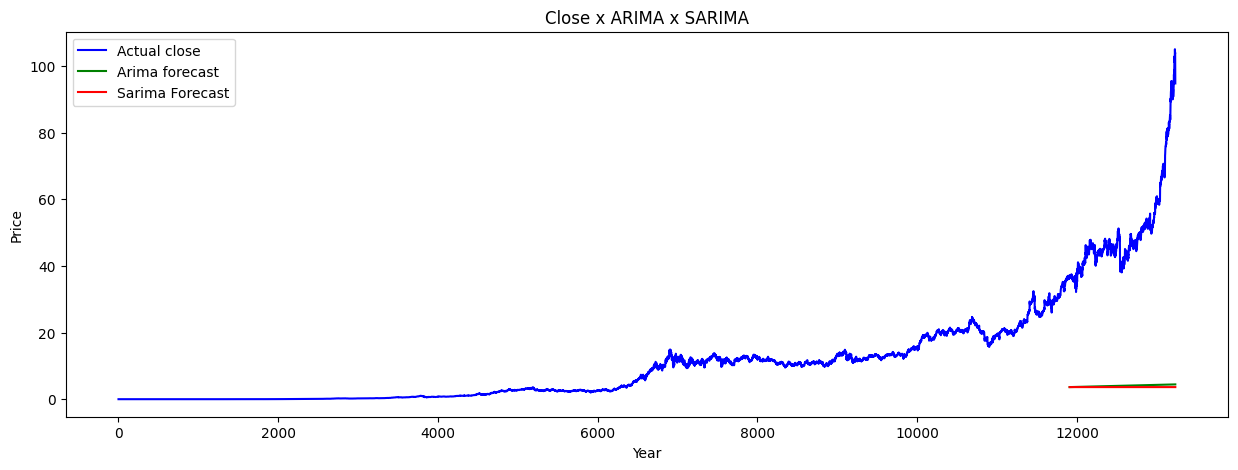

In [ ]:
#Plotting the predictions of ARIMA and SARIMA

plt.figure(figsize=(15,5))
plt.plot(df['Close'], color = 'blue', label = 'Actual close')
plt.plot(arima_forecast, color = 'green', label = 'Arima forecast')
plt.plot(sarima_forecast, color = 'red', label = 'Sarima Forecast')
plt.title('Close x ARIMA x SARIMA')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

Both ARIMA and SARIMA models predictions are not good in long term for stock price predictions as these models are unable to capture the volataility of stock prices. Also Long term prediction of stock movements are not possible.

We will try a different approch using the same ARIMA and SARIMA models, but we will use rolling window approach to predict next 100 days

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA RMSE: 3.6705301373906725
SARIMA RMSE: 3.524078871266786


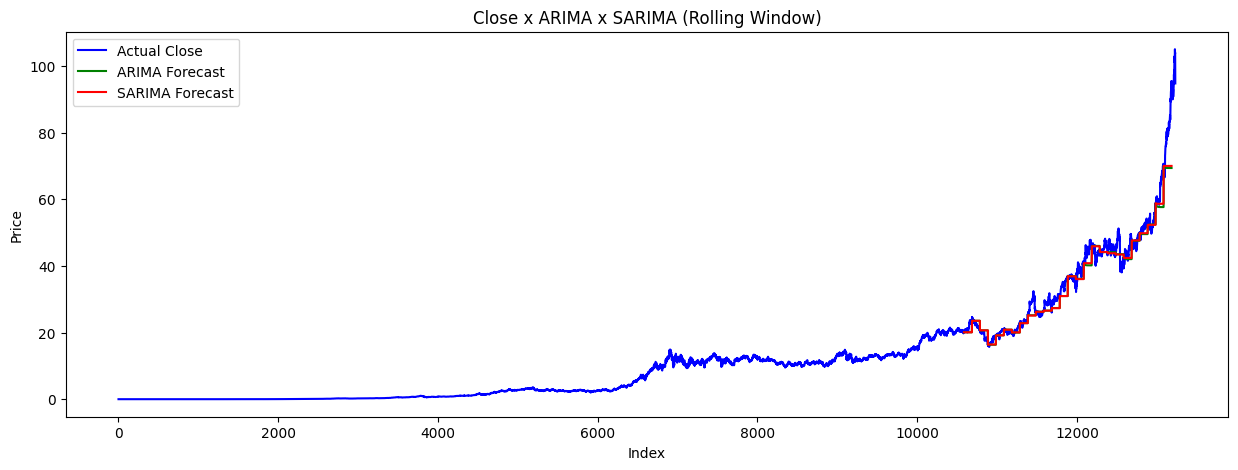

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Assuming df['Close'] is your original data
data = df['Close'].values

# Parameters
train_size = 10586  # Initial training window
horizon = 100       # Predict 100 points ahead
shift = 100         # Shift window by 100 points

# Store forecasts and actuals
arima_forecasts = []
sarima_forecasts = []
actuals = []

# Rolling window loop
for start in range(0, len(data) - train_size - horizon + 1, shift):
    # Training window
    train_data = data[start:start + train_size]

    # Log transform
    train_log = np.log1p(train_data)

    # ARIMA
    arima_model = ARIMA(train_log, order=(1, 1, 1))  # Adjusted d=1 to avoid over-differencing
    arima_result = arima_model.fit()
    arima_forecast_log = arima_result.forecast(steps=horizon)
    arima_forecast = np.expm1(arima_forecast_log)  # Back-transform to original scale

    # SARIMA (tune seasonal order based on data)
    sarima_model = SARIMAX(train_log, order=(2, 1, 5), seasonal_order=(1, 0, 1, 7))  # Changed to weekly (7) seasonality
    sarima_result = sarima_model.fit()
    sarima_forecast_log = sarima_result.forecast(steps=horizon)
    sarima_forecast = np.expm1(sarima_forecast_log)  # Back-transform

    # Actual values
    actual = data[start + train_size:start + train_size + horizon]

    # Store
    arima_forecasts.append(arima_forecast)
    sarima_forecasts.append(sarima_forecast)
    actuals.append(actual)

# Flatten for evaluation
arima_forecasts_flat = np.concatenate(arima_forecasts)
sarima_forecasts_flat = np.concatenate(sarima_forecasts)
actuals_flat = np.concatenate(actuals)

# RMSE
arima_rmse = np.sqrt(mean_squared_error(actuals_flat, arima_forecasts_flat))
sarima_rmse = np.sqrt(mean_squared_error(actuals_flat, sarima_forecasts_flat))
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")

# Plot
plt.figure(figsize=(15, 5))
plt.plot(data, color='blue', label='Actual Close')
plt.plot(range(train_size, train_size + len(arima_forecasts_flat)), arima_forecasts_flat, color='green', label='ARIMA Forecast')
plt.plot(range(train_size, train_size + len(sarima_forecasts_flat)), sarima_forecasts_flat, color='red', label='SARIMA Forecast')
plt.title('Close x ARIMA x SARIMA (Rolling Window)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Here we can see the models have captured the overall trend of the stock price movements because of rolling window approach, however it is evident that these models are not a good fit for stock price predictions

Suggestion:

- Based on the rolling window approach we can see reducting the prediction window hugely helps the model capture the trend.
- Making prediction on short term (next few days) may be used to track stock price movements
